## Covid cases in the UK

This notebook analyses the COVID data in the UK. The data itself has been compiled by the UK government and is available through the website https://coronavirus.data.gov.uk/

First, let's import some necessary items

In [1]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

Now, let's define the urls from where the data will be downloaded, as csv files, these can also be downloaded as JSON.

In [2]:
url_cases    = 'https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv'
url_deaths   = 'https://coronavirus.data.gov.uk/downloads/csv/coronavirus-deaths_latest.csv'

With these urls it is now possible to download the data from the urls and convert them to pandas DataFrames

In [3]:
cases_raw    = requests.get(url_cases).content
cases_csv    = pd.read_csv(io.StringIO(cases_raw.decode('utf-8')))
deaths_raw   = requests.get(url_deaths).content
deaths_csv   = pd.read_csv(io.StringIO(deaths_raw.decode('utf-8')))

Before any analysis or display, we can look into the structure of the DataFrame:

In [4]:
cases_csv.head()

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
0,Adur,E07000223,ltla,2020-08-05,0,190,295.5
1,Adur,E07000223,ltla,2020-08-04,0,190,295.5
2,Adur,E07000223,ltla,2020-08-03,0,190,295.5
3,Adur,E07000223,ltla,2020-08-02,0,190,295.5
4,Adur,E07000223,ltla,2020-08-01,0,190,295.5


The fields include the area name (e.g. Adur), a specific code, Area type (**ltla** = lower tier local authority, **utla** = upper tier local authority, **region**, e.g. East Midlands, **nation**), dates, Daily and cummulative cases. 

Notice that the dates are going down, that is the first cases will be at the bottom of the table, this is important when we will display the data

In [5]:
deaths_csv.head()

,Area name,Area code,Area type,Reporting date,Daily change in deaths,Cumulative deaths
0,England,E92000001,nation,2020-08-06,46,41795.0
1,England,E92000001,nation,2020-08-05,63,41749.0
2,England,E92000001,nation,2020-08-04,88,41686.0
3,England,E92000001,nation,2020-08-03,9,41598.0
4,England,E92000001,nation,2020-08-02,5,41589.0


For deaths, the fileds are similar, notice the difference in names for dates (**Reporting date/Specimen date**). General statistics can be extracted directly with describe():

In [6]:
cases_csv.describe()

,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
count,72594.000000,72594.000000,72594.000000
mean,14.295823,1349.946869,277.490541
std,107.702572,9105.971629,195.607957
min,0.000000,1.000000,0.000000
25%,1.000000,167.000000,111.125000
50%,3.000000,447.000000,277.550000
75%,9.000000,947.000000,406.400000
max,4799.000000,265849.000000,1440.900000


In [7]:
deaths_csv.describe()

,Daily change in deaths,Cumulative deaths
count,1075.000000,736.000000
mean,86.323721,12095.531250
std,203.299348,16717.092257
min,0.000000,1.000000
25%,0.000000,538.750000
50%,2.000000,1549.000000
75%,45.000000,28470.750000
max,1173.000000,46413.000000


To display the graphs (that are shown everywhere...) we need the *Daily lab-confirmed cases* from the cases and the *Daily change in deaths* from the deaths. Let's first take the cases. We can extract the specimen date to create a time axis and the cases to create the values per time.

In [8]:
time_axis = cases_csv.loc[cases_csv['Area type']=='nation',['Specimen date']]
vert_axis = cases_csv.loc[cases_csv['Area type']=='nation',['Daily lab-confirmed cases']]
time_values = time_axis['Specimen date'];
vert_values = vert_axis['Daily lab-confirmed cases']

Let's also calculate the seven day rolling average number

In [9]:
sevenDayAv  = np.convolve(vert_values,np.ones(7,)/7, mode='same')

We can now display the data:

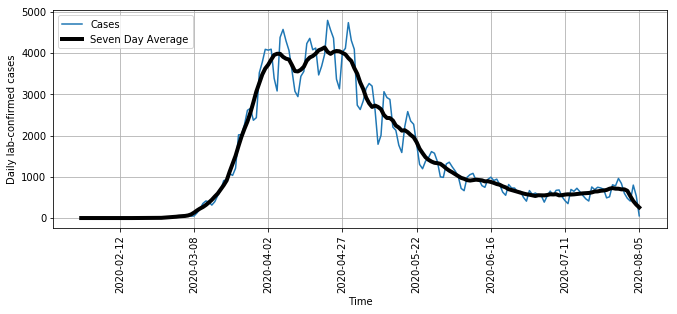

In [10]:
fig = plt.figure(figsize=(11, 4))
ax  = fig.add_subplot(111)
plt.plot(time_values,vert_values,label="Cases")
plt.plot(time_values,sevenDayAv,'k',label="Seven Day Average",linewidth=4)

plt.xlabel('Time')
plt.ylabel('Daily lab-confirmed cases')
ax.tick_params(axis='x', rotation=90)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax.invert_xaxis()
plt.legend(loc="upper left")
plt.grid()


The question (as of the 5th of August 2020) is if the cases are increasing, thus hinting a second wave coming. Let's zoom in to have a better look:

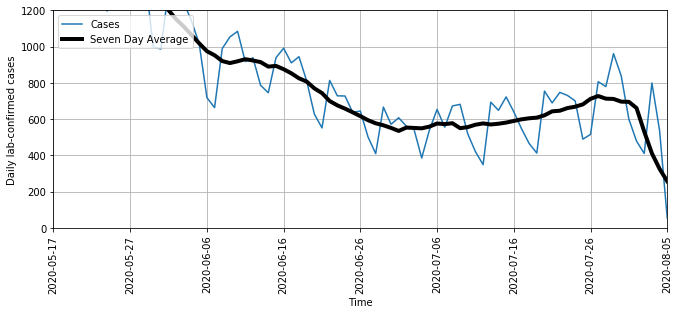

In [11]:
ax.set_xlim(0,80)
ax.set_ylim(0,1200)
ax.invert_xaxis()
fig

It does seem that the cases are going up. Let's look at deaths:

In [12]:
time_axisD = deaths_csv.loc[deaths_csv['Area type']=='UK',['Reporting date']]
vert_axisD = deaths_csv.loc[deaths_csv['Area type']=='UK',['Daily change in deaths']]
time_valuesD = time_axisD['Reporting date'];
vert_valuesD = vert_axisD['Daily change in deaths']
sevenDayAvD  = np.convolve(vert_valuesD,np.ones(7,)/7, mode='same')

In [13]:
len(time_valuesD)

215

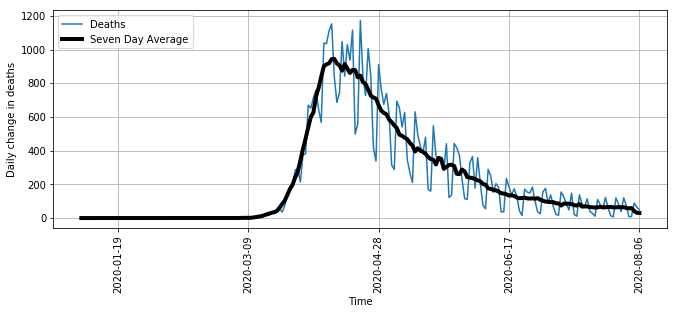

In [14]:
fig2 = plt.figure(figsize=(11, 4))
ax2  = fig2.add_subplot(111)
plt.plot(time_valuesD,vert_valuesD,label="Deaths")
plt.plot(time_valuesD,sevenDayAvD,'k',label="Seven Day Average",linewidth=4)

plt.xlabel('Time')
plt.ylabel('Daily change in deaths')
ax2.tick_params(axis='x', rotation=90)
ax2.xaxis.set_major_locator(ticker.AutoLocator())
ax2.invert_xaxis()
plt.legend(loc="upper left")
plt.grid()


In this case, it does not seem that the deaths are rising, this may be due to several factors, better knowledge of the disease and treatment, or simply that the new cases will develop and then in 2-3 weeks time the deaths will start rising.

Now, let's look at some regions. For the sake of analysis I have selected nine different regions:

In [15]:
testRegions=['Adur','Barrow-in-Furness','Carlisle','Guildford','Mid Sussex',
     'North Devon','New Forest','Stafford','Worthing']

Now I am going to display each of them in a separate subplot. So that they are easy to compare visually, let's set all to have the same vertical axis.

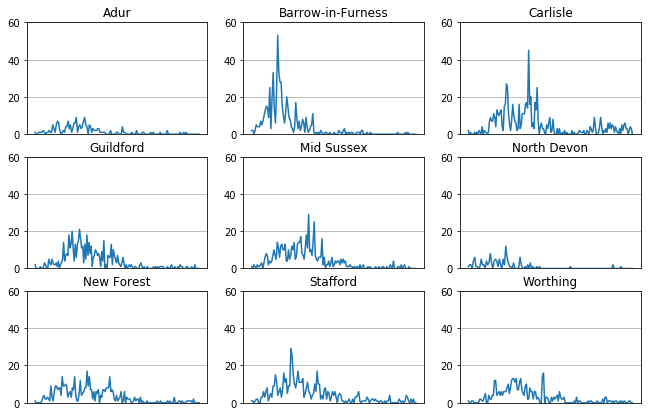

In [16]:
fig3 = plt.figure(figsize=(11, 7))

for counter in range(len(testRegions)):
    ax331  = fig3.add_subplot(3,3,counter+1)
    plt.plot(cases_csv.loc[cases_csv['Area name']==testRegions[counter],['Daily lab-confirmed cases']]) 
    plt.grid()
    ax331.invert_xaxis()
    ax331.set_ylim(0,60)
    ax331.set_title(testRegions[counter])
    ax331.set_xticks([])